# Customer Churn Analysis

Customer churn is an activity where the customer chooses to terminate the services they have been taking from the company, a kind of subscription. This may be due to any reason, be it they got better services or might have lost interest in continuing with the service. In this era of competition, where there are many others providing similar services, gaining customers' attention is even a big deal, thus losing a cutomer to your competitor is a big loss. Hence, gaining new cutomers is rather difficult than keeing old cutomers satisfied enough to keep them retaining.
Cutomer churn analysis is a kind of machine learning problem where company tries to predict which cutomers are more likely to retain or churn observing their behaviour.
It is usually seen that gaining new customer costs 5 times more than satisfying old customer to keep retaining. Hence we focus more on the false negatives i.e. we try to decrease the number of wrong predictions that the cutomer would not churn but he actually did than false positives i.e. the cutomers we predicted would churn but actually did not. 

In [1]:
# import the required libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',500)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk

from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2

In [2]:
# load the data

dt = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
dt

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [4]:
# this would give the overview of datatypes we have in our data

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
# generate a function that could give data type, unique labels, their counts and number of null values in the data

def know_your_data(dataset):
    return pd.DataFrame({'Column_name':dt.columns,
                         'data_type': dataset.dtypes.values,
                         'uniques': [dataset[i].unique() for i in dataset.columns],
                         'n_unique': [dataset[i].nunique() for i in dataset.columns],
                         'n_null': [dataset[i].isna().sum() for i in dataset.columns]})

In [6]:
know_your_data(dt)

,Column_name,data_type,uniques,n_unique,n_null
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043,0
1,Count,int64,[1],1,0
2,Country,object,[United States],1,0
3,State,object,[California],1,0
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129,0
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",1652,0
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652,0
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652,0
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651,0
9,Gender,object,"[Male, Female]",2,0


In [7]:
# it is always a good practice to replace the spaces with '_'

dt.replace(' ', '_', regex=True, inplace=True)
dt.columns = dt.columns.str.replace(' ', '_')

In [8]:
# drop the few columns that seem irrelavant and not of much help for modeling or analysis.

dt.drop(['CustomerID', 'Count', 'Country', 'State', 'Zip_Code', 'Lat_Long', 'Latitude', 'Longitude', 'Churn_Reason'],axis = 1,
        inplace = True)

In [9]:
# one doubt was, why 'Total_Charges' which was expected to be float type but is of object type?
# must be something wrong there.

dt['Total_Charges'].value_counts()

_          11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
109.5       1
2979.5      1
2978.3      1
2976.95     1
521         1
Name: Total_Charges, Length: 6531, dtype: int64

In [11]:
# the wrong was there were empty spaces('_') in place of numbers. replace them with 0.
# but why? because if we map missing values in Total_Charges to the values in Tenure_Months, we'd see they all be 0
# Hence there had been no charges for them.
#dt[dt['Total_Charges']=='_']['Tenure_Months']

dt['Total_Charges'].replace('_', 0, inplace=True)

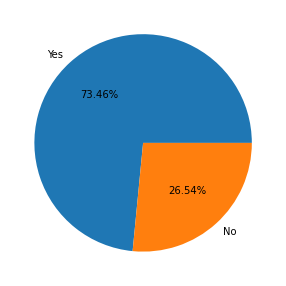

In [11]:
plt.figure(figsize=(10,5))
plt.pie(dt['Churn_Label'].value_counts(), labels = dt['Churn_Label'].unique(), autopct = '%.2f%%')
plt.show()

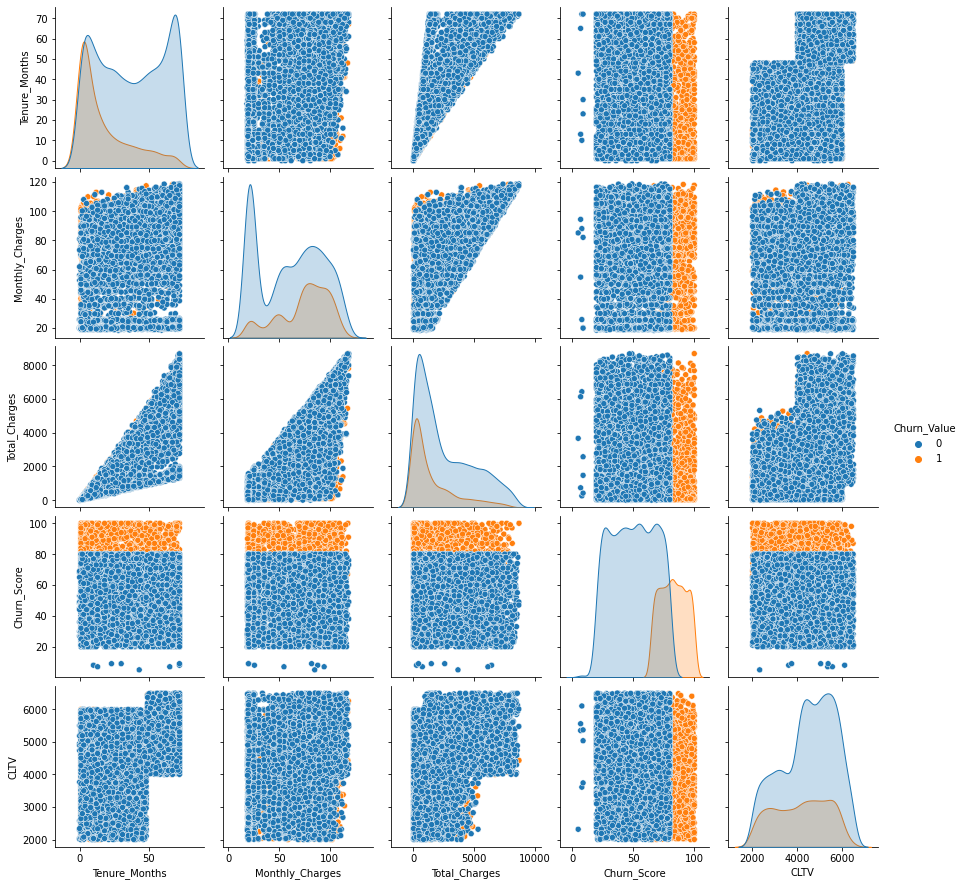

In [12]:
sns.pairplot(data=dt, hue='Churn_Value')

In [13]:
# make lists of categorical variables and numerical variables

cat_var = [var for var in know_your_data(dt)[know_your_data(dt)['data_type']=='object']['Column_name']]
cat_var.remove('Churn_Label')
cont_var = [var for var in know_your_data(dt)[know_your_data(dt)['data_type']!='object']['Column_name']]
cont_var.remove('Churn_Value')

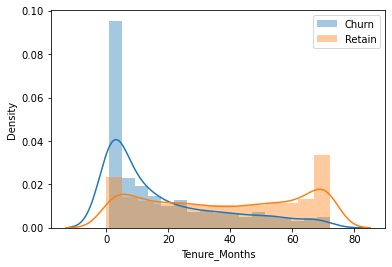

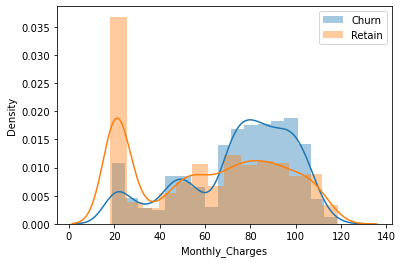

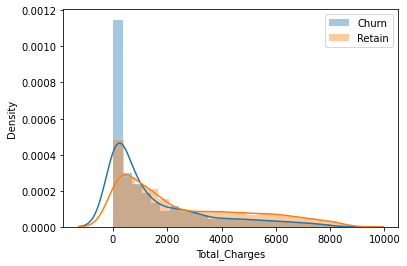

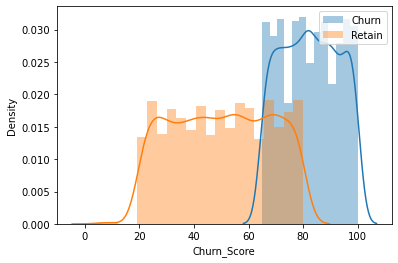

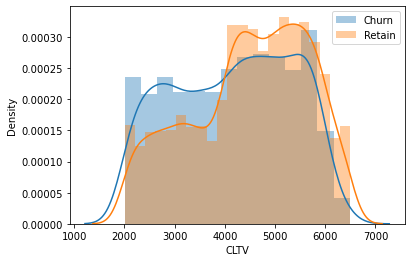

In [14]:
# make distribution plots for numerical variables

for num in cont_var:
    sns.distplot(dt[dt['Churn_Label'] == 'Yes'][num], label='Churn')
    sns.distplot(dt[dt['Churn_Label'] == 'No'][num], label='Retain')
    plt.legend(loc='upper right')
    plt.show()

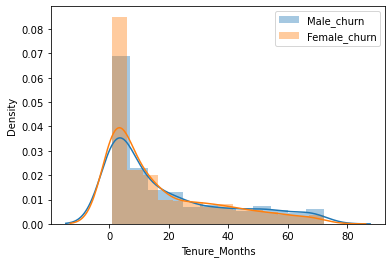

In [15]:
# distribution of the Tenure_Months for both Gender customers who churned 
sns.distplot(dt[(dt['Churn_Label'] == 'Yes') & (dt['Gender'] == 'Male')]['Tenure_Months'], label='Male_churn')
sns.distplot(dt[(dt['Churn_Label'] == 'Yes') & (dt['Gender'] == 'Female')]['Tenure_Months'], label='Female_churn')
plt.legend(loc='upper right')
plt.show()

Females are more like to churn early

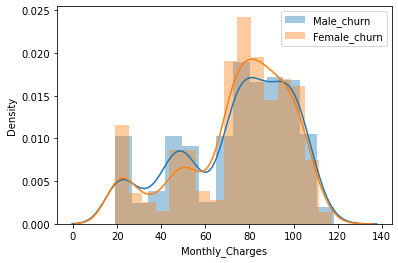

In [16]:
# distribution of Monthly_Charges for both Gender customers who churned

sns.distplot(dt[(dt['Churn_Label'] == 'Yes') & (dt['Gender'] == 'Male')]['Monthly_Charges'], label='Male_churn')
sns.distplot(dt[(dt['Churn_Label'] == 'Yes') & (dt['Gender'] == 'Female')]['Monthly_Charges'], label='Female_churn')
plt.legend(loc='upper right')
plt.show()

Males are more likely to churn at lower Monthly_Charges of 30-60, while Females are more likely to churn at higher Monthly_Charge of around 60-90

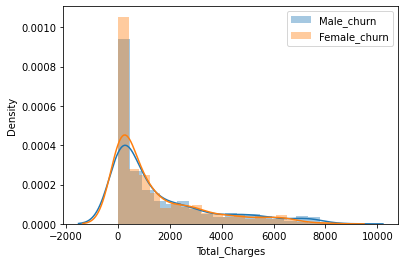

In [17]:
sns.distplot(dt[(dt['Churn_Label'] == 'Yes') & (dt['Gender'] == 'Male')]['Total_Charges'], label='Male_churn')
sns.distplot(dt[(dt['Churn_Label'] == 'Yes') & (dt['Gender'] == 'Female')]['Total_Charges'], label='Female_churn')
plt.legend(loc='upper right')
plt.show()

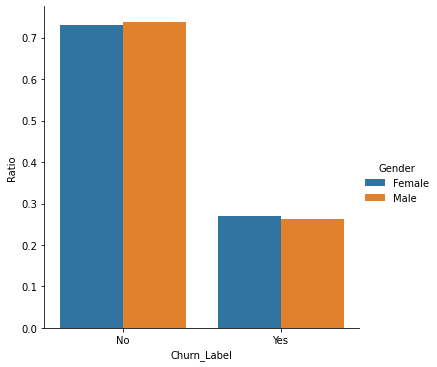

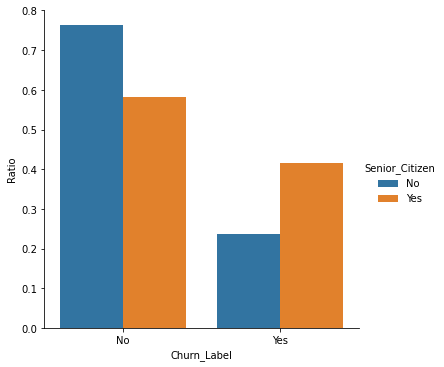

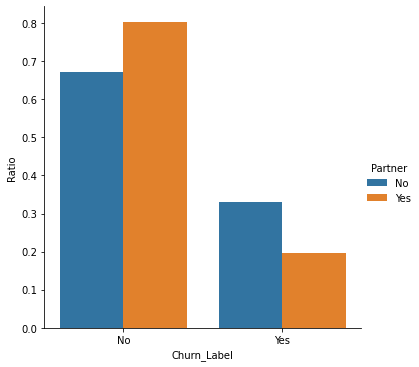

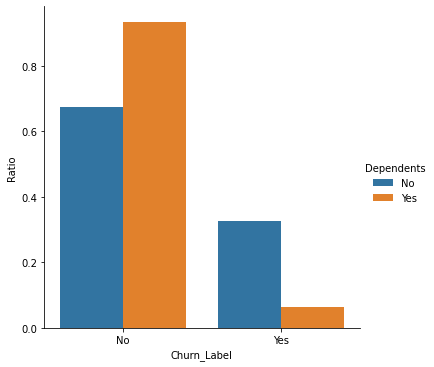

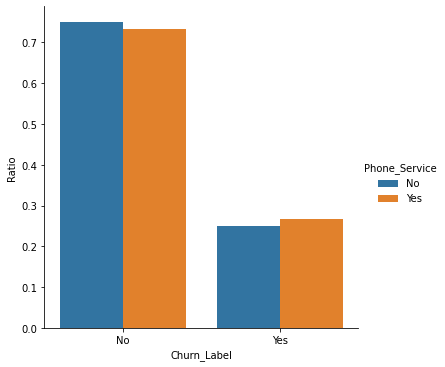

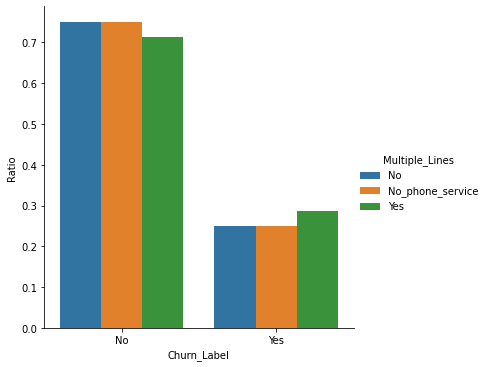

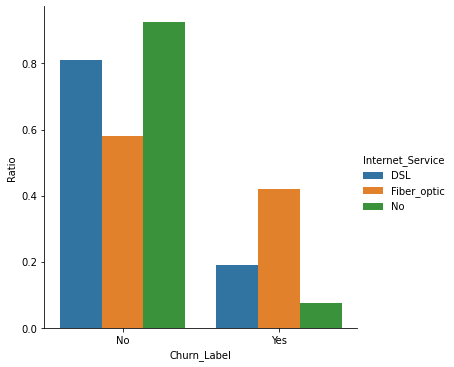

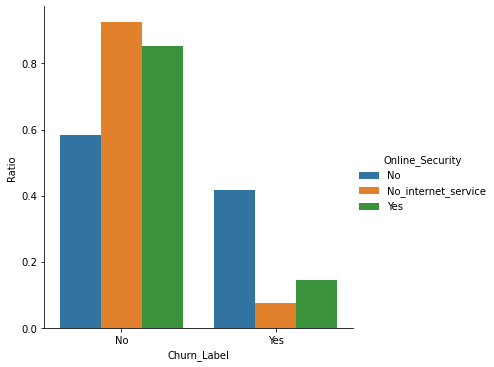

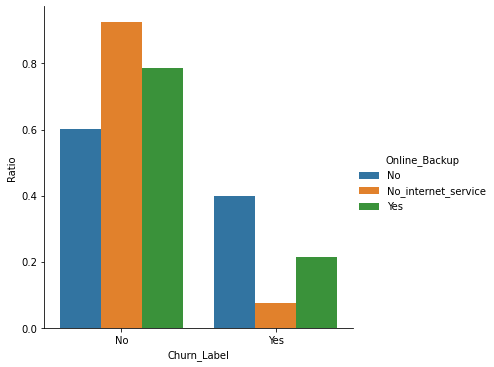

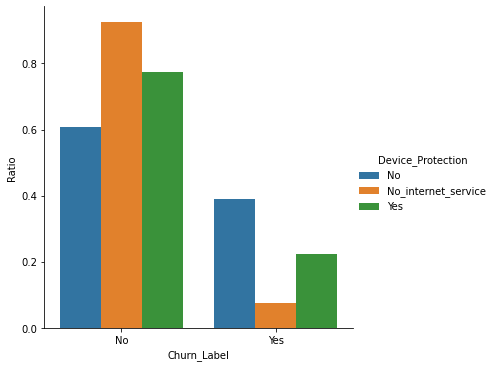

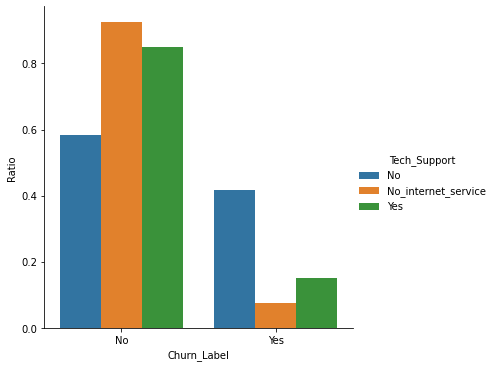

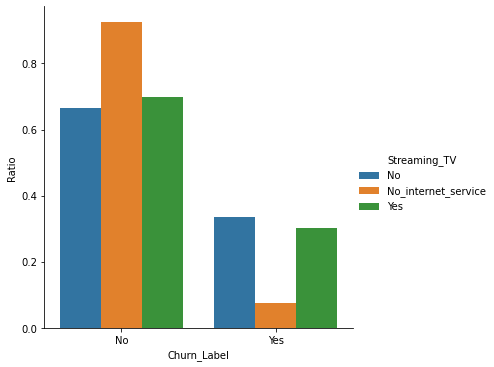

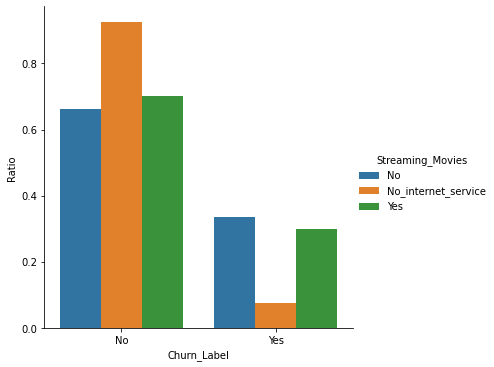

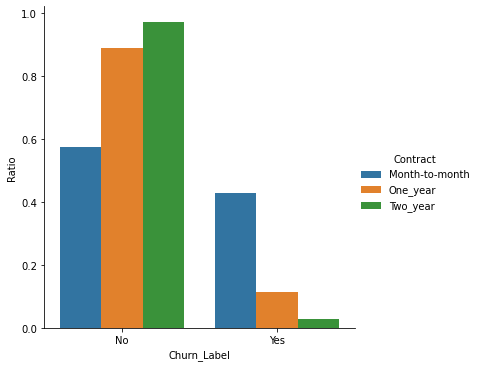

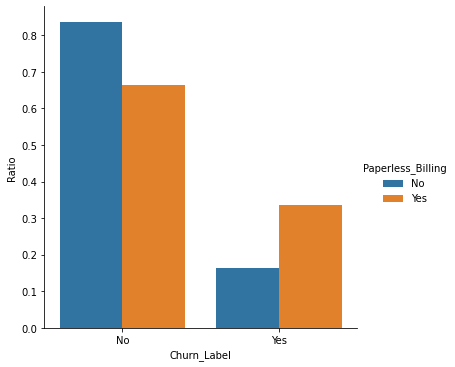

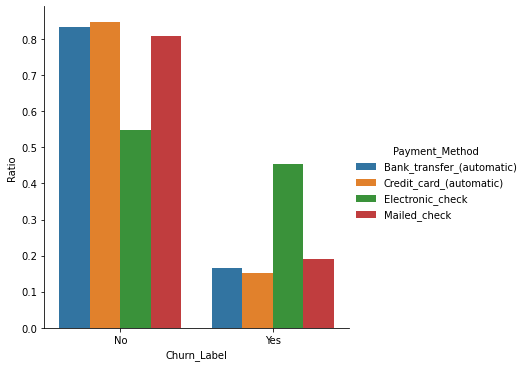

In [18]:
# plots for categorical varuiables

cat_var_no_city = cat_var.copy()
cat_var_no_city.remove('City')
for var in cat_var_no_city:
    df=dt.groupby([var])['Churn_Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn_Label':'Ratio'}).reset_index()
    sns.catplot(data = df, x='Churn_Label', y='Ratio', kind='bar', hue=var)

Senior citizens, customers with no Partners, customers with no Dependents, Internet_Service with Fiber optics, customers with no Online_Security, no Online_Backup, no Device_Protection, no Tech_Support, customers with Month_to_month Contract, those paying through Electronic_Check are all more likely to churn than other factors of their own class.

In [19]:
pd.crosstab(index=dt.Payment_Method, columns=dt.Churn_Label)

Churn_Label,No,Yes
Payment_Method,,
Bank_transfer_(automatic),1286,258
Credit_card_(automatic),1290,232
Electronic_check,1294,1071
Mailed_check,1304,308


### Here now we'll try to reduce number of cities

In [20]:
df_r = dt.groupby(['City'])['Churn_Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn_Label':'Ratio'}).reset_index()
df_r

,City,Churn_Label,Ratio
0,Acampo,Yes,0.75
1,Acampo,No,0.25
2,Acton,No,1.00
3,Adelanto,No,0.80
4,Adelanto,Yes,0.20
...,...,...,...
1945,Yucaipa,No,0.75
1946,Yucaipa,Yes,0.25
1947,Yucca_Valley,No,1.00
1948,Zenia,No,0.75


In [21]:
df_r[(df_r['Ratio']==1)&(df_r['Churn_Label']=='Yes')]

,City,Churn_Label,Ratio
183,Boulder_Creek,Yes,1.0
521,Eldridge,Yes,1.0
601,Fort_Jones,Yes,1.0
814,Johannesburg,Yes,1.0
1018,Maricopa,Yes,1.0
1454,Riverbank,Yes,1.0
1629,Smith_River,Yes,1.0
1655,South_Lake_Tahoe,Yes,1.0
1752,Tipton,Yes,1.0
1778,Truckee,Yes,1.0


In [22]:
df_r[(df_r['Ratio']==1)&(df_r['Churn_Label']=='No')]

,City,Churn_Label,Ratio
2,Acton,No,1.0
13,Alameda,No,1.0
14,Alamo,No,1.0
17,Albion,No,1.0
22,Aliso_Viejo,No,1.0
...,...,...,...
1916,Wishon,No,1.0
1925,Woodlake,No,1.0
1941,Yountville,No,1.0
1942,Yreka,No,1.0


In [23]:
#df[(df['Ratio']!=1)&(df['Ratio']>=0.7)&(df['Churn_Label']=='Yes')].sort_values('Ratio', ascending=False)

In [24]:
city_counts = dt['City'].value_counts().to_frame()
dt['City'].replace(city_counts[city_counts['City']<=30].index.to_list(),'Rare_Customers', inplace=True)

In [25]:
dt.groupby(['City'])['Churn_Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn_Label':'Ratio'}).reset_index().sort_values('Ratio')

,City,Churn_Label,Ratio
1,Bakersfield,Yes,0.075000
19,Sacramento,Yes,0.240741
13,Oakland,Yes,0.250000
17,Riverside,Yes,0.250000
5,Fresno,Yes,0.250000
9,Long_Beach,Yes,0.250000
25,San_Jose,Yes,0.258929
15,Rare_Customers,Yes,0.263390
27,Stockton,Yes,0.272727
3,Berkeley,Yes,0.281250


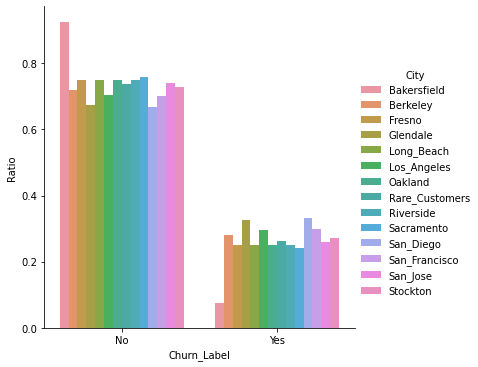

In [26]:
df=dt.groupby(['City'])['Churn_Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn_Label':'Ratio'}).reset_index()
sns.catplot(data = df, x='Churn_Label', y='Ratio', kind='bar', hue='City')

Customers from Bakersfield are least likely to churn

In [27]:
def check_dependence(cat_var_1, cat_var_2):
    stat, p, dof, expected = chi2_contingency(pd.crosstab(dt[cat_var_1], dt[cat_var_2], margins = False).values)
    alpha = 0.05
    if p <= alpha:
        print_ = 'Dependent (reject H0)'
    else:
        print_ = 'Independent (H0 holds true)'
    return print_, stat, p

dep=[]
statistic = []
p_value = []

for var in cat_var:
    dep.append(check_dependence('Churn_Label',var)[0])
    statistic.append(check_dependence('Churn_Label',var)[1])
    p_value.append(check_dependence('Churn_Label',var)[2])
    
pd.DataFrame({'cat_var':cat_var,'Statistic':statistic, 'p-value':p_value, 'dependency':dep}).sort_values('Statistic', ascending=False)

,cat_var,Statistic,p-value,dependency
14,Contract,1184.596572,5.863038e-258,Dependent (reject H0)
8,Online_Security,849.998968,2.661150e-185,Dependent (reject H0)
11,Tech_Support,828.197068,1.443084e-180,Dependent (reject H0)
7,Internet_Service,732.309590,9.571788e-160,Dependent (reject H0)
16,Payment_Method,648.142327,3.682355e-140,Dependent (reject H0)
9,Online_Backup,601.812790,2.079759e-131,Dependent (reject H0)
10,Device_Protection,558.419369,5.505219e-122,Dependent (reject H0)
4,Dependents,433.734379,2.500972e-96,Dependent (reject H0)
13,Streaming_Movies,375.661479,2.667757e-82,Dependent (reject H0)
12,Streaming_TV,374.203943,5.528994e-82,Dependent (reject H0)


This gave us the dependency of Churn_Value over all categorical attributes. The above table only gives us the direct dependency when other factors are not taken into consideration. For instance, Gender alone is not the factor for classification here as we saw both males and females are equally likely to churn other factors ignored. But involvement of other factors would indeed have some effect.

In [28]:
dt.drop('Churn_Label',axis=1,inplace=True)

In [29]:
cat_var = [var for var in know_your_data(dt)[know_your_data(dt)['data_type']=='object']['Column_name']]
cont_var = [var for var in know_your_data(dt)[know_your_data(dt)['data_type']!='object']['Column_name']]
cont_var.remove('Churn_Value')

In [30]:
dt.corr()

,Tenure_Months,Monthly_Charges,Total_Charges,Churn_Value,Churn_Score,CLTV
Tenure_Months,1.000000,0.247900,0.826178,-0.352229,-0.224987,0.396406
Monthly_Charges,0.247900,1.000000,0.651174,0.193356,0.133754,0.098693
Total_Charges,0.826178,0.651174,1.000000,-0.198324,-0.123410,0.342091
Churn_Value,-0.352229,0.193356,-0.198324,1.000000,0.664897,-0.127463
Churn_Score,-0.224987,0.133754,-0.123410,0.664897,1.000000,-0.079782
CLTV,0.396406,0.098693,0.342091,-0.127463,-0.079782,1.000000


Strong correlation can be seen between Total_Charges and Tenure_Months, hence we can do PCA

In [32]:
from scipy import stats
for var in cont_var:
    test, pval = stats.shapiro(dt[var])

    if pval < 0.05:
        print('normal')
    else:
        print('not normal')

normal
normal
normal
normal
normal


We will be making four models, namely Logistic, KNeighbors, RandomForest and XGBoost, and then compare them all. 

Also we should keep in mind that the dataset we have is imbalanced, and hence would require some balancing techniques like oversampling and undersampling.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as XGB

In [34]:
logit = LogisticRegression(random_state = 1)
rfc = RandomForestClassifier(max_depth = 10)
knn = KNeighborsClassifier(n_neighbors = 5)
xgb = XGB.XGBClassifier(objective='binary:logistic', missing = 1, seed = 42)
smote = SMOTE(random_state = 1, sampling_strategy = 0.5) 
under = RandomUnderSampler(random_state = 1, sampling_strategy = 0.6)

In [35]:
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

In [36]:
# Here we make the pipelines

# pipeline for filling missing values and perform scaling
pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median', missing_values = np.nan)),
    ('scaler', StandardScaler())
])

# pipeline for onehotencoding of categorical variables
pipe_cat = Pipeline([
    ('one_hot', OneHotEncoder(drop = 'first'))
])

# pipeline for PCA
pipe_pca = Pipeline([
    ('pca', PCA(n_components = 1))
])

# for combining above three pipelines and perform the transformation
transformer = ColumnTransformer([
    ('pipe_num', pipe_num, cont_var),
    ('pipe_cat', pipe_cat, cat_var),
    ('pipe_pca', pipe_pca, ['Total_Charges', 'Tenure_Months'])
])


logit_pipe_combined = Pipeline([
    ('transformer', transformer),
    ('rfe', RFE(logit)),
    ('over_sampling', smote),
    ('under_sampling', under),
    ('logit', logit)
])

rfc_pipe_combined = Pipeline([
    ('transformer', transformer),
    ('rfe', RFE(rfc)),
    ('resampling', smote),
    ('under_sampling', under),
    ('rfc', rfc)
])

knn_pipe_combined = Pipeline([
    ('transformer', transformer),
    ('resampling', smote),
    ('under_sampling', under),
    ('knn', knn)
])

In [37]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold,\
StratifiedKFold

In [38]:
X = dt.drop(columns='Churn_Value')
y = dt['Churn_Value']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, stratify=y)


rskf = RepeatedStratifiedKFold(n_splits = 5, random_state = 1)

logit_score = cross_val_score(logit_pipe_combined, X_train_val, y_train_val, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(rfc_pipe_combined, X_train_val, y_train_val, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)
knn_score = cross_val_score(knn_pipe_combined, X_train_val, y_train_val, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


In [39]:
print('Logit Val Score:', logit_score)
print('RFC Val Score:', rfc_score)
print('KNN Val Score:', knn_score)

Logit Val Score: [0.89966555 0.88628763 0.90301003 0.87625418 0.88963211 0.89297659
 0.90301003 0.89632107 0.88628763 0.86622074 0.89297659 0.85618729
 0.9264214  0.909699   0.86287625 0.88963211 0.91638796 0.8729097
 0.85284281 0.89297659 0.91973244 0.90635452 0.90635452 0.86956522
 0.84949833 0.9264214  0.89966555 0.84615385 0.85618729 0.91304348
 0.88294314 0.86956522 0.89632107 0.89297659 0.91973244 0.88294314
 0.88294314 0.909699   0.86956522 0.89297659 0.88963211 0.89297659
 0.89297659 0.89966555 0.8729097  0.89966555 0.91304348 0.86287625
 0.87625418 0.89632107]
RFC Val Score: [0.89297659 0.89632107 0.87625418 0.88294314 0.89632107 0.88963211
 0.90301003 0.89966555 0.88628763 0.85284281 0.909699   0.87959866
 0.91973244 0.89966555 0.86622074 0.88628763 0.89632107 0.88628763
 0.87625418 0.91304348 0.9264214  0.89966555 0.90301003 0.86622074
 0.85618729 0.909699   0.87625418 0.87959866 0.89297659 0.89297659
 0.87625418 0.85618729 0.90301003 0.89297659 0.92976589 0.87625418
 0.8896

In [40]:
print('Logit Val Score:', logit_score.mean())
print('RFC Val Score:', rfc_score.mean())
print('KNN Val Score:', knn_score.mean())

Logit Val Score: 0.8892307692307692
RFC Val Score: 0.8907023411371235
KNN Val Score: 0.5527759197324414


Validation score for KNN is very small as compared to other two, hence we would be knocking it out.

In [41]:
logit_pipe_combined.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('pipe_num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['Tenure_Months', 'Monthly_Charges',
                                     'Total_Charges', 'Churn_Score', 'CLTV']),
                                   ('pipe_cat',
                                    Pipeline(steps=[('one_hot',
                                                     OneHotEncoder(drop='first'))]),
                                    ['City', 'Gender', 'Senior_Citizen', 'Partner',
                                     'Dependents', 'Phone_Service',
                                     'Multiple_Lines', 'Internet_Service',
                                     'Online_Security', 'Online_Backup',
                       

In [42]:
rfc_pipe_combined.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('pipe_num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['Tenure_Months', 'Monthly_Charges',
                                     'Total_Charges', 'Churn_Score', 'CLTV']),
                                   ('pipe_cat',
                                    Pipeline(steps=[('one_hot',
                                                     OneHotEncoder(drop='first'))]),
                                    ['City', 'Gender', 'Senior_Citizen', 'Partner',
                                     'Dependents', 'Phone_Service',
                                     'Multiple_Lines', 'Internet_Service',
                                     'Online_Security', 'Online_Backup',
                       

In [43]:
logit_params = {
    'logit__C': np.linspace(0,1,10),
    'logit__solver': ['lbfgs', 'liblinear', 'newton-cg'],
    'transformer__pipe_num__imputer__strategy': ['median', 'mean']
}

rfc_params = {
    'rfc__max_depth': np.arange(10,16),
    'rfc__min_samples_split': np.arange(7,10),
    'transformer__pipe_num__imputer__strategy': ['median', 'mean']
}

In [44]:
logit_grid = GridSearchCV(logit_pipe_combined, param_grid=logit_params, scoring='recall', verbose=1, n_jobs=-1)
logit_grid.fit(X_train_val, y_train_val)

rfc_grid = GridSearchCV(rfc_pipe_combined, param_grid=rfc_params, scoring='recall', verbose=1, n_jobs=-1)
rfc_grid.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Tenure_Months',
                                                                          'Monthly_Charges',
                                                                          'Total_Charges',
                                                                          'Churn_Score',
                                                           

In [45]:
logit_tuned = logit_grid.best_estimator_
logit_tuned_score = cross_val_score(logit_tuned, X_train_val, y_train_val, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)
print(logit_tuned_score)

rfc_tuned = rfc_grid.best_estimator_
rfc_tuned_score = cross_val_score(rfc_tuned, X_train_val, y_train_val, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)
print(rfc_tuned_score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[0.89966555 0.89297659 0.90635452 0.89966555 0.89632107 0.90301003
 0.909699   0.90635452 0.89632107 0.87625418 0.90301003 0.86622074
 0.92976589 0.90635452 0.86956522 0.89966555 0.92976589 0.87959866
 0.88294314 0.89297659 0.91973244 0.91304348 0.91304348 0.86622074
 0.85284281 0.9264214  0.89966555 0.86287625 0.86956522 0.92307692
 0.90301003 0.87625418 0.89297659 0.89632107 0.9264214  0.89297659
 0.89966555 0.91304348 0.88294314 0.88294314 0.88628763 0.90301003
 0.90635452 0.91638796 0.88294314 0.91304348 0.91973244 0.86622074
 0.88963211 0.90301003]


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min


[0.89632107 0.89966555 0.85953177 0.88963211 0.89632107 0.89297659
 0.89966555 0.89632107 0.88963211 0.85953177 0.909699   0.87959866
 0.91973244 0.88963211 0.8729097  0.88628763 0.88963211 0.88294314
 0.86622074 0.909699   0.92976589 0.89632107 0.91304348 0.87959866
 0.86287625 0.90301003 0.88628763 0.87959866 0.87625418 0.89632107
 0.8729097  0.84949833 0.90301003 0.88294314 0.92307692 0.87625418
 0.89297659 0.9264214  0.86956522 0.88628763 0.88294314 0.89297659
 0.89966555 0.89297659 0.86622074 0.88628763 0.90635452 0.89297659
 0.87959866 0.88963211]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


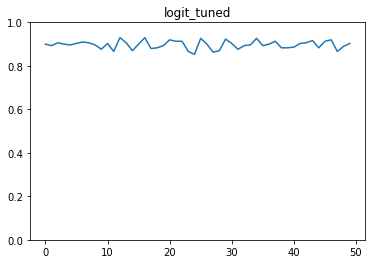

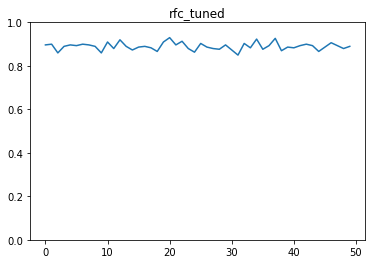

In [46]:
plt.plot(np.arange(len(logit_tuned_score)), logit_tuned_score)
plt.title('logit_tuned')
plt.ylim(0,1)
plt.show()

plt.plot(np.arange(len(rfc_tuned_score)), rfc_tuned_score)
plt.title('rfc_tuned')
plt.ylim(0,1)
plt.show()

In [47]:
print(logit_tuned_score.mean())
print(rfc_tuned_score.mean())

0.8969230769230769
0.8896321070234113


### XGBoost

In [48]:
xgb.fit(transformer.fit_transform(X_train_val), y_train_val, verbose = True, early_stopping_rounds = 10, eval_metric = 'aucpr', eval_set = [(transformer.transform(X_test),y_test)])

[0]	validation_0-aucpr:0.95562
[1]	validation_0-aucpr:0.95867
[2]	validation_0-aucpr:0.96134
[3]	validation_0-aucpr:0.96312
[4]	validation_0-aucpr:0.96383
[5]	validation_0-aucpr:0.96376
[6]	validation_0-aucpr:0.96488
[7]	validation_0-aucpr:0.96523
[8]	validation_0-aucpr:0.96567
[9]	validation_0-aucpr:0.96523
[10]	validation_0-aucpr:0.96606
[11]	validation_0-aucpr:0.96620
[12]	validation_0-aucpr:0.96561
[13]	validation_0-aucpr:0.96530
[14]	validation_0-aucpr:0.96616
[15]	validation_0-aucpr:0.96618
[16]	validation_0-aucpr:0.96600
[17]	validation_0-aucpr:0.96535
[18]	validation_0-aucpr:0.96467
[19]	validation_0-aucpr:0.96421
[20]	validation_0-aucpr:0.96402
[21]	validation_0-aucpr:0.96373


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [49]:
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix

Text(0.5, 1.0, 'xgb')

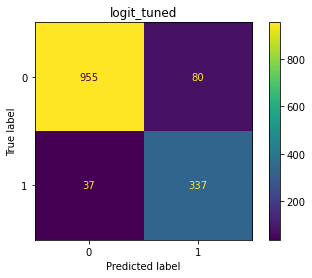

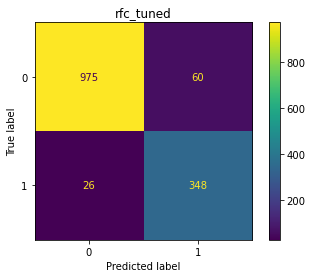

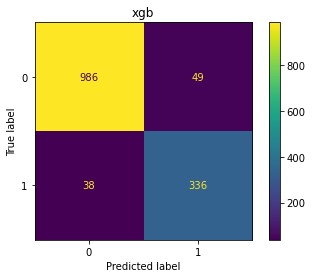

In [50]:
logit_tuned.fit(X_train_val, y_train_val)
plot_confusion_matrix(logit_tuned, X_test, y_test)
plt.title('logit_tuned')

rfc_tuned.fit(X_train_val, y_train_val)
plot_confusion_matrix(rfc_tuned, X_test, y_test)
plt.title('rfc_tuned')

plot_confusion_matrix(xgb, transformer.transform(X_test), y_test)
plt.title('xgb')

Classification been done, results are fine, but doesn't mean they are best. This does not meet the requirement of low false negatives.

Text(0.5, 1.0, 'xgb')

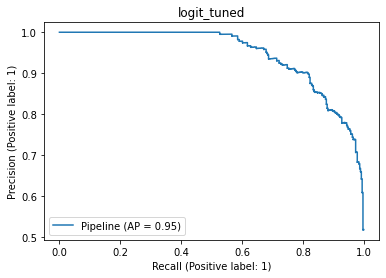

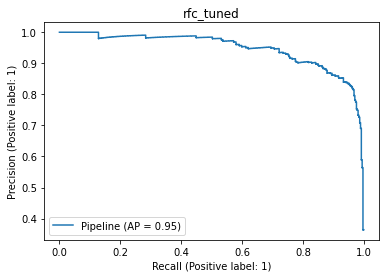

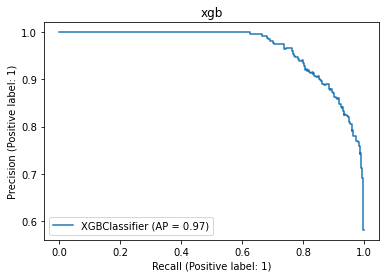

In [51]:
plot_precision_recall_curve(logit_tuned, X_test, y_test)
plt.title('logit_tuned')
plot_precision_recall_curve(rfc_tuned, X_test, y_test)
plt.title('rfc_tuned')
plot_precision_recall_curve(xgb, transformer.transform(X_test), y_test)
plt.title('xgb')

Above were the outputs/results when threshold is 0.5 

By working on threshold we can approach our requirement.

In [52]:
p, r, t = precision_recall_curve(y_test, logit_tuned.predict_proba(X_test)[:,1])
len(p[:-1]), len(r[:-1]), len(t)
logit_pr_df = pd.DataFrame({'precision': p[:-1], 'recall': r[:-1], 'threshold': t})
print(logit_pr_df)

p, r, t = precision_recall_curve(y_test, rfc_tuned.predict_proba(X_test)[:,1])
len(p[:-1]), len(r[:-1]), len(t)
rfc_pr_df = pd.DataFrame({'precision': p[:-1], 'recall': r[:-1], 'threshold': t})
print(rfc_pr_df)

p, r, t = precision_recall_curve(y_test, xgb.predict_proba(transformer.transform(X_test))[:,1])
len(p[:-1]), len(r[:-1]), len(t)
xgb_pr_df = pd.DataFrame({'precision': p[:-1], 'recall': r[:-1], 'threshold': t})
print(xgb_pr_df)

     precision    recall  threshold
0     0.518724  1.000000   0.049374
1     0.518056  0.997326   0.051100
2     0.518776  0.997326   0.051337
3     0.519499  0.997326   0.052420
4     0.520223  0.997326   0.052843
..         ...       ...        ...
710   1.000000  0.013369   0.997621
711   1.000000  0.010695   0.997638
712   1.000000  0.008021   0.997666
713   1.000000  0.005348   0.997950
714   1.000000  0.002674   0.997959

[715 rows x 3 columns]
      precision    recall  threshold
0      0.364167  1.000000   0.033115
1      0.363548  0.997326   0.033302
2      0.363902  0.997326   0.033318
3      0.364258  0.997326   0.033366
4      0.364614  0.997326   0.033517
...         ...       ...        ...
1022   1.000000  0.013369   0.983223
1023   1.000000  0.010695   0.983976
1024   1.000000  0.008021   0.984003
1025   1.000000  0.005348   0.986208
1026   1.000000  0.002674   0.986512

[1027 rows x 3 columns]
     precision    recall  threshold
0     0.580745  1.000000   0.017963
1  

In [54]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

By trying changing the threshold and calculating the Total cost, we can choose that threshold which could cost the company the least, i.e. we could decrease our false negatives.

Note: Here we are taking retaining cost as 50 and churn price as 250(5 times of retaining cost) per customer.

In [55]:
proba1 = logit_tuned.predict_proba(X_test)[:,1]
y_pred = logit_tuned.predict(X_test)
thresh =0.33
pred_logit = np.where(proba1 > thresh, 1, 0)

print(confusion_matrix(y_test, pred_logit))
matrix = confusion_matrix(y_test, pred_logit)
fnr = round(matrix[1,0]/(matrix[0,0]+matrix[1,0])*100,2)
fpr = round(matrix[0,1]/(matrix[0,1]+matrix[1,1])*100,2)
print("Customer who don't get a treatment and run away:", fnr,"%")
print("Customer who get a treatment but actually still with us:", fpr,"%")
print("Total Cost:",fnr*250+fpr*50 )

[[907 128]
 [ 12 362]]
Customer who don't get a treatment and run away: 1.31 %
Customer who get a treatment but actually still with us: 26.12 %
Total Cost: 1633.5


In [73]:
proba1 = rfc_tuned.predict_proba(X_test)[:,1]
y_pred = rfc_tuned.predict(X_test)
thresh =0.21
pred_rfc = np.where(proba1 > thresh, 1, 0)

In [74]:
print(confusion_matrix(y_test, pred_rfc))
matrix = confusion_matrix(y_test, pred_rfc)
fnr = round(matrix[1,0]/(matrix[0,0]+matrix[1,0])*100,2)
fpr = round(matrix[0,1]/(matrix[0,1]+matrix[1,1])*100,2)
print("Customer who don't get a treatment and run away:", fnr,"%")
print("Customer who get a treatment but actually still with us:", fpr,"%")
print("Total Cost:",fnr*250+fpr*50 )

[[899 136]
 [  6 368]]
Customer who don't get a treatment and run away: 0.66 %
Customer who get a treatment but actually still with us: 26.98 %
Total Cost: 1514.0


In [75]:
proba1 = xgb.predict_proba(transformer.transform(X_test))[:,1]
y_pred = xgb.predict(transformer.transform(X_test))
thresh =0.21
pred_xgb = np.where(proba1 > thresh, 1, 0)

In [76]:
print(confusion_matrix(y_test, pred_xgb))
matrix = confusion_matrix(y_test, pred_xgb)
fnr = round(matrix[1,0]/(matrix[0,0]+matrix[1,0])*100,2)
fpr = round(matrix[0,1]/(matrix[0,1]+matrix[1,1])*100,2)
print("Customer who don't get a treatment and run away:", fnr,"%")
print("Customer who get a treatment but actually still with us:", fpr,"%")
print("Total Cost:",fnr*250+fpr*50 )

[[916 119]
 [  5 369]]
Customer who don't get a treatment and run away: 0.54 %
Customer who get a treatment but actually still with us: 24.39 %
Total Cost: 1354.5


In above all cases we could see the decrease in false negatives, which was our main aim i.e. target was to minimize the number of false predictions where cutomer was predicted to not churn but actually churned.

To achieve better results we can combine the results of three models and take the mode.

In [60]:
pd.DataFrame({'pred_logit':pred_logit,
              'pred_rfc':pred_rfc,
              'pred_xgb':pred_xgb,
              'y_test':y_test
             }).head(60)

,pred_logit,pred_rfc,pred_xgb,y_test
2926,0,0,0,0
4423,0,0,0,0
6651,0,0,0,0
2040,0,0,0,0
3406,0,0,0,0
2399,0,0,0,0
4629,0,0,0,0
618,1,1,1,1
5038,0,0,0,0
2412,0,0,0,0


#### I would like to thank Ridho Arya as I took help from his repository uploaded on kaggle at 
https://www.kaggle.com/ridhoaryo/telco-churn-analysis-and-modeling